# MEDICAL INSURANCE COST PREDICTION

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV


In [138]:
data = pd.read_csv('C:\Desktop\jebinu\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [161]:
df.shape

(1338, 10)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


Categorical Features:

 - Sex<br>
 - Smoker<br>
 - Region<br>

In [160]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
region_0    0
region_1    0
region_2    0
region_3    0
dtype: int64

## Data Analysis

In [162]:
df.describe()

,age,sex,bmi,children,smoker,charges,region_0,region_1,region_2,region_3
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.795217,13270.422265,0.272048,0.242900,0.242152,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.445181,0.428995,0.428546,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,1.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,30.400000,1.000000,1.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,16639.912515,1.000000,0.000000,0.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


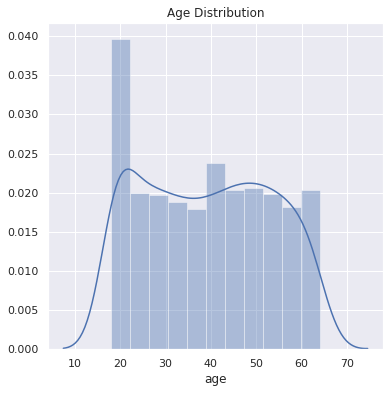

In [163]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

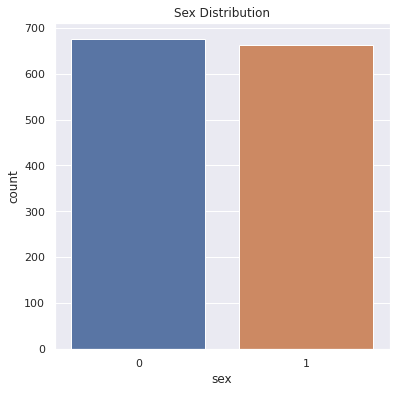

In [164]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

In [12]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

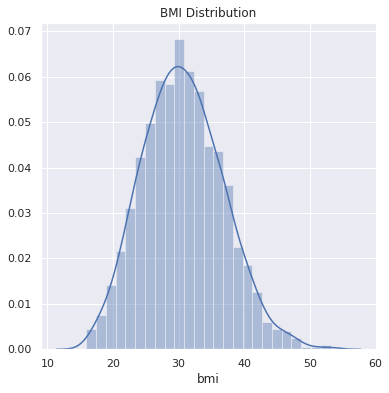

In [13]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

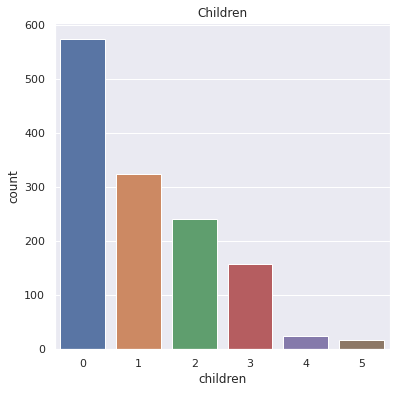

In [14]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

In [15]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

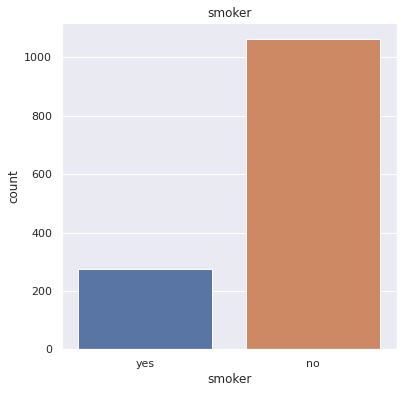

In [16]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

In [17]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

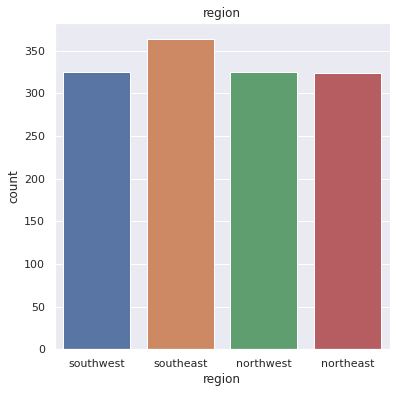

In [18]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

In [19]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

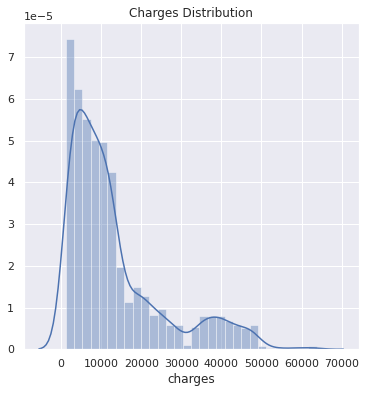

In [20]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

## Data Pre-Processing

### Encoding the categorical features

In [148]:
df['sex'] = df['sex'].astype('category').cat.codes

df['smoker'] = df['smoker'].astype('category').cat.codes
df = pd.get_dummies(df, columns=['region'], prefix='region')

df.head()

,age,sex,bmi,children,smoker,charges,region_0,region_1,region_2,region_3
0,19,1,27.900,0,0,16884.92400,0,1,0,0
1,18,0,33.770,1,1,1725.55230,1,0,0,0
2,28,0,33.000,3,1,4449.46200,1,0,0,0
3,33,0,22.705,0,1,21984.47061,0,0,0,1
4,32,0,28.880,0,1,3866.85520,0,0,0,1


In [149]:
from sklearn.preprocessing import StandardScaler
data_pre = df.copy()

tempBmi = data_pre.bmi
tempBmi = tempBmi.values.reshape(-1,1)
data_pre['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = data_pre.age
tempAge = tempAge.values.reshape(-1,1)
data_pre['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = data_pre.charges
tempCharges = tempCharges.values.reshape(-1,1)
data_pre['charges'] = StandardScaler().fit_transform(tempCharges)

data_pre.head()

,age,sex,bmi,children,smoker,charges,region_0,region_1,region_2,region_3
0,-1.438764,1,-0.453320,0,0,0.298584,0,1,0,0
1,-1.509965,0,0.509621,1,1,-0.953689,1,0,0,0
2,-0.797954,0,0.383307,3,1,-0.728675,1,0,0,0
3,-0.441948,0,-1.305531,0,1,0.719843,0,0,0,1
4,-0.513149,0,-0.292556,0,1,-0.776802,0,0,0,1


### Splitting the Features and Target

In [150]:
X = data_pre.drop(columns='charges', axis=1)
Y = data_pre['charges']

In [151]:
print(X)

           age  sex       bmi  children  smoker  region_0  region_1  region_2  \
0    -1.438764    1 -0.453320         0       0         0         1         0   
1    -1.509965    0  0.509621         1       1         1         0         0   
2    -0.797954    0  0.383307         3       1         1         0         0   
3    -0.441948    0 -1.305531         0       1         0         0         0   
4    -0.513149    0 -0.292556         0       1         0         0         0   
...        ...  ...       ...       ...     ...       ...       ...       ...   
1333  0.768473    0  0.050297         3       1         0         0         0   
1334 -1.509965    1  0.206139         0       1         0         0         1   
1335 -1.509965    1  1.014878         0       1         1         0         0   
1336 -1.296362    1 -0.797813         0       1         0         1         0   
1337  1.551686    1 -0.261388         0       0         0         0         0   

      region_3  
0         

In [152]:
print(Y)

0       0.298584
1      -0.953689
2      -0.728675
3       0.719843
4      -0.776802
          ...   
1333   -0.220551
1334   -0.914002
1335   -0.961596
1336   -0.930362
1337    1.311053
Name: charges, Length: 1338, dtype: float64


In [153]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [154]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 9) (1070, 9) (268, 9)


### Model Training

### Linear Regression

In [155]:
# loading the Linear Regression model
linear_reg = LinearRegression()

In [156]:
linear_reg.fit(X_train, Y_train)

LinearRegression()

### Model Evaluation

In [157]:
cv_linear_reg = cross_val_score(estimator = linear_reg, X = X, y = Y, cv = 10)

y_pred_linear_reg_train = linear_reg.predict(X_train)
r2_score_linear_reg_train = r2_score(Y_train, y_pred_linear_reg_train)

y_pred_linear_reg_test = linear_reg.predict(X_test)
r2_score_linear_reg_test = r2_score(Y_test, y_pred_linear_reg_test)

rmse_linear = (np.sqrt(mean_squared_error(Y_test, y_pred_linear_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_linear_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_linear_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_linear_reg_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

CV Linear Regression : 0.745
R2_score (train) : 0.752
R2_score (test) : 0.745
RMSE : 0.511


## Support Vector Machine ( Regression)

In [68]:
svr = SVR()
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }
svr_grid = GridSearchCV(estimator=svr, param_grid=parameters, cv=10, verbose=4, n_jobs=-1)
svr_grid.fit(X_train, Y_train.ravel())

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   30.6s finished


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['rbf', 'sigmoid'], 'tol': [0.0001]},
             verbose=4)

In [70]:
svr = SVR(C=10, gamma=0.1, tol=0.0001)
svr.fit(X_train, Y_train.ravel())
print(svr_grid.best_estimator_)
print(svr_grid.best_score_)

SVR(C=10, gamma=0.1, tol=0.0001)
0.8348564104222909


In [71]:
cv_svr = svr_grid.best_score_

y_pred_svr_train = svr.predict(X_train)
r2_score_svr_train = r2_score(Y_train, y_pred_svr_train)

y_pred_svr_test = svr.predict(X_test)
r2_score_svr_test = r2_score(Y_test, y_pred_svr_test)

rmse_svr = (np.sqrt(mean_squared_error(Y_test, y_pred_svr_test)))

print('CV : {0:.3f}'.format(cv_svr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_svr_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_svr_test))
print('RMSE : {0:.3f}'.format(rmse_svr))
     
     

CV : 0.835
R2_score (train) : 0.858
R2 score (test) : 0.861
RMSE : 0.377


## Ridge Regression

In [73]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
steps = [ ('scalar', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        ('model', Ridge())]

ridge_pipe = Pipeline(steps)

In [75]:
parameters = { 'model__alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1,2,5,10,20,25,35, 43,55,100], 'model__random_state' : [42]}
reg_ridge = GridSearchCV(ridge_pipe, parameters, cv=10)
reg_ridge = reg_ridge.fit(X_train, Y_train.ravel())

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.15373e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.21121e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.86269e-19): result may not be accurate.
  overwrite_a=True).T
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.12903e-19): result may not be accurate.
  overwrite_a=True).T


In [76]:
reg_ridge.best_estimator_, reg_ridge.best_score_

(Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                 ('model', Ridge(alpha=25, random_state=42))]),
 0.8280093510587022)

In [77]:
ridge = Ridge(alpha=20, random_state=42)
ridge.fit(X_train, Y_train.ravel())
cv_ridge = reg_ridge.best_score_

y_pred_ridge_train = ridge.predict(X_train)
r2_score_ridge_train = r2_score(Y_train, y_pred_ridge_train)

y_pred_ridge_test = ridge.predict(X_test)
r2_score_ridge_test = r2_score(Y_test, y_pred_ridge_test)

rmse_ridge = (np.sqrt(mean_squared_error(Y_test, y_pred_linear_reg_test)))
print('CV : {0:.3f}'.format(cv_ridge.mean()))
print('R2 score (train) : {0:.3f}'.format(r2_score_ridge_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_ridge_test))
print('RMSE : {0:.3f}'.format(rmse_ridge))

CV : 0.828
R2 score (train) : 0.745
R2 score (test) : 0.739
RMSE : 0.511


## Random Forest Regressor

In [78]:
reg_rf = RandomForestRegressor()
parameters = { 'n_estimators':[600,1000,1200],
             'max_features': ["auto"],
             'max_depth':[40,50,60],
             'min_samples_split': [5,7,9],
             'min_samples_leaf': [7,10,12],
             'criterion': ['mse']}

reg_rf_gscv = GridSearchCV(estimator=reg_rf, param_grid=parameters, cv=10, n_jobs=-1)
reg_rf_gscv = reg_rf_gscv.fit(X_train, Y_train.ravel())

In [79]:
reg_rf_gscv.best_score_, reg_rf_gscv.best_estimator_

(0.8466837530172281,
 RandomForestRegressor(max_depth=40, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=600))

In [80]:
rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=1200)
rf_reg.fit(X_train, Y_train.ravel())

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [81]:
cv_rf = reg_rf_gscv.best_score_

y_pred_rf_train = rf_reg.predict(X_train)
r2_score_rf_train = r2_score(Y_train, y_pred_rf_train)

y_pred_rf_test = rf_reg.predict(X_test)
r2_score_rf_test = r2_score(Y_test, y_pred_rf_test)

rmse_rf = np.sqrt(mean_squared_error(Y_test, y_pred_rf_test))

print('CV : {0:.3f}'.format(cv_rf.mean()))
print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test))
print('RMSE : {0:.3f}'.format(rmse_rf))

CV : 0.847
R2 score (train) : 0.888
R2 score (test) : 0.867
RMSE : 0.370


In [82]:
models = [('Linear Regression', rmse_linear, r2_score_linear_reg_train, r2_score_linear_reg_test, cv_linear_reg.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

In [83]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,0.511478,0.751506,0.744727,0.744657
1,Ridge Regression,0.511478,0.744612,0.739343,0.828009
2,Support Vector Regression,0.377283,0.857663,0.861106,0.834856
3,Random Forest Regression,0.369677,0.887799,0.866650,0.846684


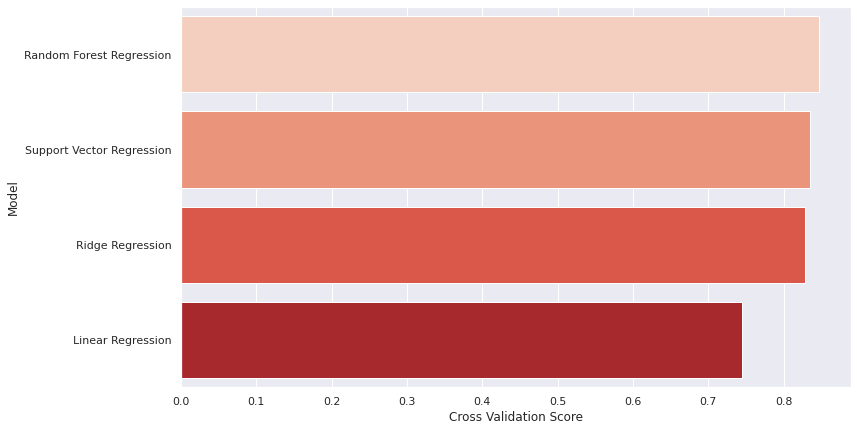

In [84]:
plt.figure(figsize=(12,7))
predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model',data = predict, palette='Reds')
plt.xlabel('Cross Validation Score')
plt.ylabel('Model')
plt.show()

## Building a Predictive System

In [159]:
input_data = (31,1,25.75,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf_reg.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[4348.81798661]
The insurance cost is USD  4348.817986614037
